# Data

In [20]:
import tensorflow as tf
import keras
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from keras.layers import Input, Lambda
import keras.backend as K
from keras.utils import plot_model
from keras.models import Model

# import mnist dataset
from tensorflow.keras.datasets import mnist

from resnet import ResNet18
# load dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = Y_train.astype('float32')
Y_test = Y_test.astype('float32')


# set the colormap.
plt.rc("image",cmap="gray")

(28, 28)

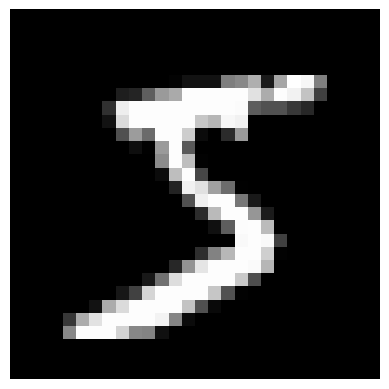

In [2]:
# example image
plt.imshow(tf.squeeze(X_train[0]))
plt.axis("off")

# get the input shape
data_input_shape = X_train[0].shape
data_input_shape

### RESNET-18

In [3]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.2,shuffle = True)
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)

In [4]:
earlystop = keras.callbacks.EarlyStopping(
    min_delta=0.01,
    restore_best_weights=True,
    patience=3,
)

In [5]:
resnet_18 = ResNet18()
resnet_18(tf.zeros([1, 28,28,1]), training = True)
resnet_18.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
resnet_18.summary()

Model: "res_net18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_conv2d (MyConv2D)            │ ?                      │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block (ResidualBlock)  │ ?                      │        74,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_1                │ ?                      │        74,368 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_2                │ ?                      │       231,296 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_3                │ ?                      │       296,192 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_4                │ ?                      │       921,344 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_5                │ ?                      │     1,182,208 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_6                │ ?                      │     3,677,696 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ residual_block_7                │ ?                      │     4,723,712 │
│ (ResidualBlock)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,189,770 (42.69 MB)

 Trainable params: 11,180,170 (42.65 MB)

 Non-trainable params: 9,600 (37.50 KB)

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_train.shape


(48000, 28, 28, 1)

In [24]:
x_train.shape

(48000, 28, 28, 1)

In [7]:
y_train_encoded.shape

(48000, 10)

In [8]:
history = resnet_18.fit(x_train, y_train_encoded, batch_size=1024,epochs=10, validation_data=(x_val, y_val_encoded), callbacks=[earlystop])

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.8256 - loss: 0.6880 - val_accuracy: 0.3985 - val_loss: 11.3500
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9862 - loss: 0.0452 - val_accuracy: 0.5546 - val_loss: 2.5688
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 45s 956ms/step - accuracy: 0.9919 - loss: 0.0265 - val_accuracy: 0.9212 - val_loss: 0.3190
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 46s 972ms/step - accuracy: 0.9936 - loss: 0.0203 - val_accuracy: 0.9749 - val_loss: 0.0974
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9940 - loss: 0.0187 - val_accuracy: 0.9845 - val_loss: 0.0619
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9958 - loss: 0.0121 - val_accuracy: 0.9585 - val_loss: 0.1946
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9963 - loss: 0.0116 - val_accuracy: 0.9837 - val_loss: 0.0710
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9978 - loss: 0.0070 - val_accuracy: 0.9797 - va

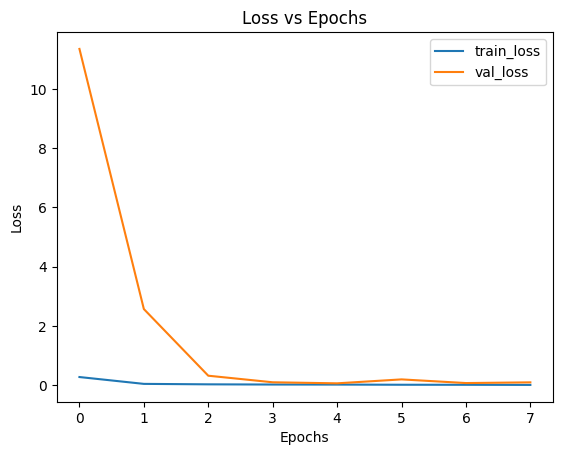

In [9]:
# plot the training history
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [10]:
# test the model
x_test = X_test.reshape(-1, 28, 28, 1)
y_test_encoded = to_categorical(Y_test)
y_pred = resnet_18.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step


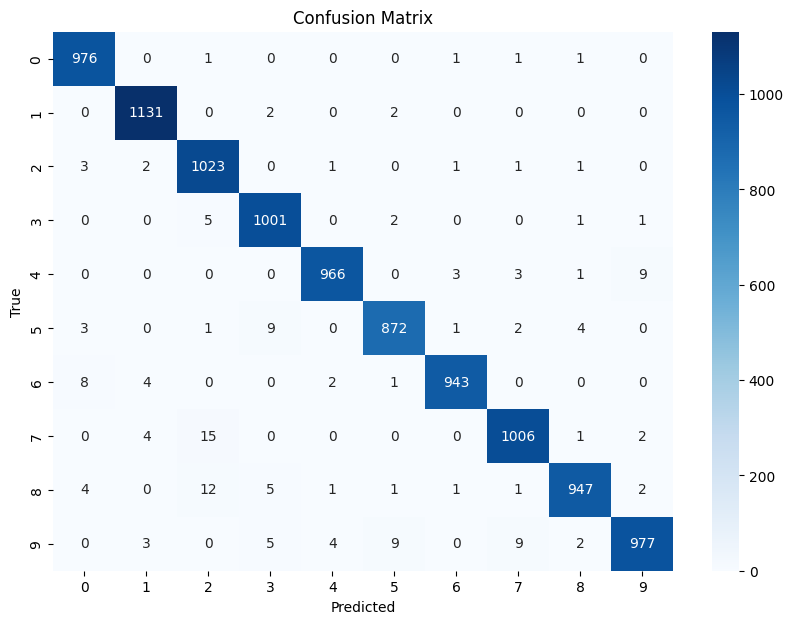

In [11]:

# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

y_pred = resnet_18.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = Y_test.astype("int")
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, index=range(10), columns=range(10))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [12]:
# print accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9842


In [13]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

# FSL

In [34]:
def triplet_loss(margin=1):
    """
    A function that returns a triplet loss function. We will usa this as a loss function for our model.
    """
    def _triplet_loss(y_true, y_pred):
        print(y_pred.shape)
        # get the anchor, positive and negative embeddings
        anchor, positive, negative = y_pred
        # calculate the distance between the anchor and the positive
        positive_distance = K.sum(K.square(anchor - positive), axis=-1)
        negative_distance = K.sum(K.square(anchor - negative), axis=-1)
        # compute the triplet loss
        return K.mean(K.maximum(positive_distance - negative_distance + margin, 0.0))
    return _triplet_loss

def get_triplets(x, y, n_classes, n_samples):
    triplets = []
    # create an array of labels
    labels = np.arange(n_classes)
    for label in labels:
        # get the indices of images belongs the current class
        class_indices = np.where(y == label)[0]
        # Labels of all other classes
        other_indices = np.where(y != label)[0]

        for i in range(n_samples):
            # Select an anchor from the current class
            anchor_index = class_indices[i% len(class_indices)]

            # Select a positive sample from the current class
            positive_index = class_indices[(i+1) % len(class_indices)]

            # Select a negative sample from the other classes
            negative_index = np.random.choice(other_indices)

            # Append the triplet to the triplets list
            triplets.append([x[anchor_index], x[positive_index], x[negative_index]])

    return np.array(triplets)

def classify_query(support_embedding, query_embeddings, support_labels):
    """
    A function that classifies a query image based on the support set.
    """
    # calculate the distance between the query image and the support images
    distances = np.linalg.norm(support_embedding[:, None] - query_embeddings[None, :], axis=2)
    # get the index of the support image with the minimum distance
    nearest_indices = np.argmin(distances, axis=0)
    # return the labels of the nearest support images
    return support_labels[nearest_indices]

In [30]:
base_model = ResNet18()

input_shape = (28, 28, 1)

# define inputs for triplet loss function

anchor_input = Input(input_shape, name="anchor_input")
positive_input = Input(input_shape, name="positive_input")
negative_input = Input(input_shape, name="negative_input")


# Process each input through the same base network (ResNet18)

encoded_anchor = base_model(anchor_input)
encoded_positive = base_model(positive_input)
encoded_negative = base_model(negative_input)

# define the triplet network

triplet_network = Model(inputs=[anchor_input, positive_input, negative_input], outputs=[encoded_anchor, encoded_positive, encoded_negative])

triplet_network.compile(optimizer="adam", loss=triplet_loss())

triplet_network.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ anchor_input        │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positive_input      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ negative_input      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res_net18_12        │ (None, 10)        │ 11,189,770 │ anchor_input[0][… │
│ (ResNet18)          │                   │            │ positive_input[0… │
│                     │                   │            │ negative_input[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,189,770 (42.69 MB)

 Trainable params: 11,180,170 (42.65 MB)

 Non-trainable params: 9,600 (37.50 KB)

In [37]:
# get anchor, positive and negative

ValueError: 'a' cannot be empty unless no samples are taken

In [39]:
n_classes = 10
n_samples = 60 # number of samples per class

# get the triplets
triplet_pairs = get_triplets(x_train, y_train, n_classes, n_samples)
print(triplet_pairs[0])
y_dummy = np.zeros((len(triplet_pairs)))

anchors = triplet_pairs[:, 0]
positives = triplet_pairs[:, 1]
negatives = triplet_pairs[:, 2]

# train the triplet network
triplet_network.fit([anchors, positives, negatives], y_dummy, batch_size=128, epochs=5,callbacks=[earlystop])

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

OperatorNotAllowedInGraphError: Iterating over a symbolic `tf.Tensor` is not allowed. You can attempt the following resolutions to the problem: If you are running in Graph mode, use Eager execution mode or decorate this function with @tf.function. If you are using AutoGraph, you can try decorating this function with @tf.function. If that does not work, then you may be using an unsupported feature or your source code may not be visible to AutoGraph. See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/autograph/g3doc/reference/limitations.md#access-to-source-code for more information.